## Observations and Insights 

In [45]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results ,mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [18]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_mouse)

['g989']


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse) == False]
clean_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [23]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df["Mouse ID"].unique())

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tv_mean=clean_combined_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tv_median=clean_combined_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tv_variance=clean_combined_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tv_std=clean_combined_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tv_sem=clean_combined_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
tv_summary_stat = pd.DataFrame({"Tumor Volume Mean (mm3)": tv_mean,
                                "Tumor Volume Median (mm3)": tv_median,
                                "Tumor Volume Variance (mm3)": tv_variance,
                                "Tumor Volume STD (mm3)": tv_std,
                                "Tumor Volume SEM (mm3)": tv_sem})
# Formatting
tv_summary_stat = tv_summary_stat.round(2)

tv_summary_stat

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tv_summary_stat_2 = (clean_combined_df.groupby("Drug Regimen")).agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

# Formating
tv_summary_stat_2 = tv_summary_stat_2.round(2)
tv_summary_stat_2 = tv_summary_stat_2.rename(columns={"mean": "Tumor Volume Mean (mm3)","median":"Tumor Volume Median (mm3)",
                                                     "var":"Tumor Volume Variance (mm3)","std":"Tumor Volume STD (mm3)","sem":"Tumor Volume SEM (mm3)"})
tv_summary_stat_2


,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

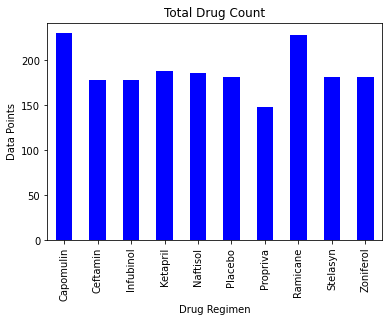

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Calculate the total number of measurements taken on each drug regimen
regimen_data_points = clean_combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Bar plot using pandas
regimen_data_points.plot(kind="bar", facecolor='blue')

# Chart title
plt.title("Total Drug Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

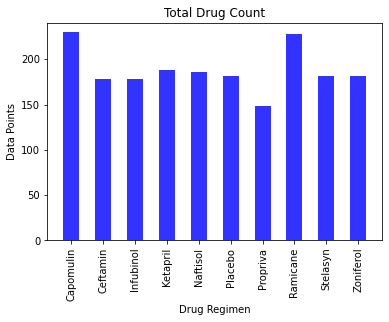

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Create an array for the total number of measurements taken on each drug regimen
data_points_array = (clean_combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]).tolist()
data_points_array

# Bar plot using pyplot
x_axis = np.arange(len(regimen_data_points))
plt.bar(x_axis, data_points_array, color='b', alpha=0.8, align='center',  width= .5)

# Formating
tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_points_array)+10)

plt.title("Total Drug Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Calculate the distribution of female versus male mice
by_gender = combined_data.groupby(["Mouse ID","Sex"])
by_gender_df = pd.DataFrame(by_gender.size())

# Create the dataframe with total count
mice_by_gender_df = pd.DataFrame(by_gender_df.groupby(["Sex"]).count())
mice_by_gender_df.columns = ["Total Count"]
# Calculate percentage
mice_by_gender_df["Gender Percentage"] = (100*(mice_by_gender_df["Total Count"]/mice_by_gender_df["Total Count"].sum())).round(2)

# Distribution of female versus male mice data frame
mice_by_gender_df

,Total Count,Gender Percentage
Sex,,
Female,124,49.8
Male,125,50.2


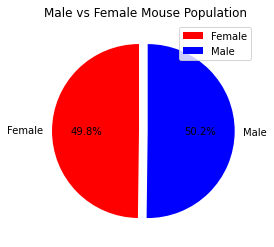

In [122]:
# Pie plot using pandas

plot = mice_by_gender_df.plot.pie(y='Total Count', colors=['red', 'blue'],explode = (0.1, 0), autopct="%1.1f%%", startangle=90)

# Formatting
plt.ylabel(" ")
plt.title("Male vs Female Mouse Population ")
plt.show()

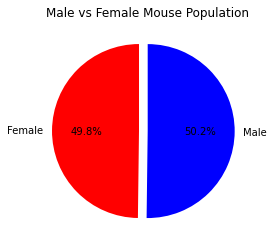

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = mice_by_gender_df.index
distribution = mice_by_gender_df["Gender Percentage"]

# Pie plot using pyplot
plt.pie(distribution, labels=labels, colors = ['red', 'blue'],explode = (0.1, 0), autopct="%1.1f%%", startangle=90 )

#Formatting
plt.title("Male vs Female Mouse Population")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
